# Dotplots in Biology

A [dotplot](https://en.wikipedia.org/wiki/Dot_plot_%28bioinformatics%29) is a type of plot that shows how two sequences are similar. For every stretch of subsequence of length k (i.e. the `kmer_size`) that is shared between the two sequences, we place a dot with offset x,y corresponding to the locations of the kmer found in both sequences. Diagonal lines represent longer stretches of similarity.

In this notebook, we display the dotplot of a sequence against itself. This can uncover portions of the sequence that are self-similar, or repetitive. Genomic DNA often contains repetitive sequences.

In [8]:
sequence = ''
sequence__format = 'textarea'
sequence__placeholder = 'Paste a fasta sequence here'

kmer_size = 8

In [2]:
import io
from collections import defaultdict
import matplotlib.pyplot as plt
from util import reverse_complement, readfq

In [9]:
if not sequence:
    sequence = '''>test
AAAAAAAAAAAAACCCCCCCCCCCGGGGGGGGGGGGGGTTTTTTTTTTTTTTAAAAAAAAAAAAAAAAAAA
'''

In [35]:
def dotplot(seq1, seq2, kmer_size=10, num_points=50000, id1=None, id2=None):
    ''' dotplot tuned to sequences ~50 kb in length
    '''
    # enumerate kmers
    kmers1 = defaultdict(list)
    kmers2 = defaultdict(list)
    for i in range(len(seq1)-kmer_size):
        kmers1[seq1[i:i+kmer_size]].append(i)
    for i in range(len(seq2)-kmer_size):
        kmers2[seq2[i:i+kmer_size]].append(i)
    
    # handle reverse complement
    seq2rc = reverse_complement(seq2)
    len2 = len(seq2rc)
    for i in range(len(seq2rc)-kmer_size):
        kmers2[seq2rc[i:i+kmer_size]].append(len2-i)
    
    # accumulate dots
    x = []
    y = []
    for kmer in kmers1:
        for i in kmers1[kmer]:
            for j in kmers2[kmer]:
                x.append(i)
                y.append(j)
    
    # draw scatter plot
    plt.figure(figsize=(12,12))
    plt.xlim(0, max(x))
    plt.ylim(0, max(y))
    plt.axes().set_aspect('equal')    
    
    skip = 0
    if num_points:
        skip = len(x) // num_points
    # plot is faster than scatter: http://stackoverflow.com/questions/23489560/stop-matplotlib-scatter-plot-to-slow-down-while-adding-new-data
    plot_options = dict(linestyle='', marker='.', markersize=1, color='black', alpha=0.2, 
                        markeredgecolor='none', )
    if max(x) < 1000:
        plot_options['alpha'] = 1.0
        plot_options['markersize'] = 1000 // max(x)
    elif max(x) < 10000:
        plot_options['alpha'] = 1.0

    if skip > 1:
        #print "Showing {subset} of {total} points".format(subset=len(x)/skip, total=len(x))
        plt.plot(x[0::skip], y[0::skip], **plot_options)
    else:
        plt.plot(x, y, **plot_options)
    plt.grid(True)
    plt.xticks(rotation='vertical')
    if id1: plt.xlabel(id1)
    if id2: plt.ylabel(id2)
    plt.show()

/Users/lhon/notebooks/dotplot/env/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


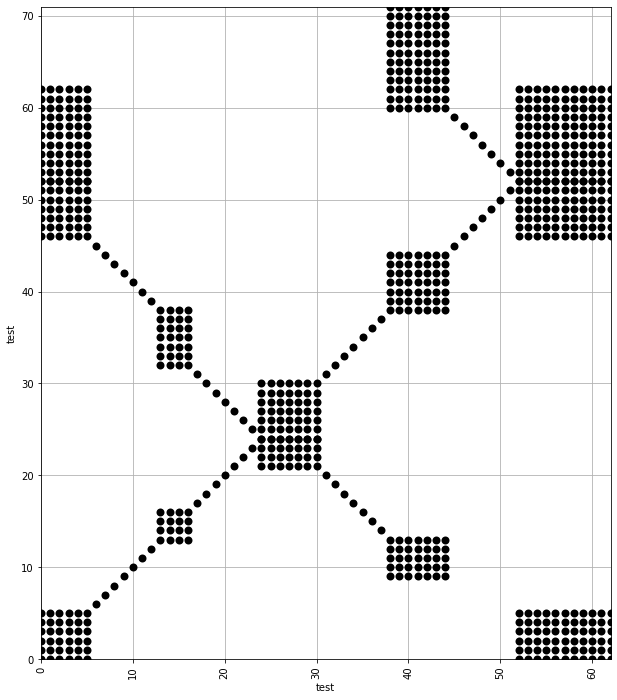

In [36]:
for id, seq, quals in readfq(io.StringIO(sequence)):
    dotplot(seq, seq, kmer_size=kmer_size, id1=id, id2=id)
    break

